高压液相法生产HDPE

2个CSTR反应器

Aspen对照文件: ./Aspen/hdpe/hdpe.bkp

![avatar](image/hdpe.png)


In [1]:
# 导包
import numpy as np
from polymer_model.flowsheet.flowsheet import Flowsheet
from polymer_model.unit_model.stream import MaterialStream
from polymer_model.unit_model.cstr import CSTR
from polymer_model.unit_model.flash import Flash

In [2]:
# 设置组分和物性方法
# 流程的组分：
components = {
    "Titanium Tetrachloride": {"type": "conventional"},
    "Triethyl Aluminum": {"type": "conventional"},
    "Ethylene": {"type": "conventional"},
    "Hydrogen": {"type": "conventional"},
    "N-hexane": {"type": "conventional"},
    "HDPE": {"type": "polymer"},
    "Ethylene-R": {"type": "segment"},
}

# 流程的聚合物
polymers = {
    # 链段
    "segments": {"Ethylene-R":{"type": "repeat"}}, 
    # 催化剂
    "catalyst": {"Titanium Tetrachloride": {"type": "Z-N",       # 催化剂类型
                        "site_types_num":4,  # 位点数
                        "site_conc":0.1,    # 位点浓度, mol/kgcat
                        }},
    # 聚合物分子量分布
    "Distribution": {"Number of points":100, "Upper limit":100000, "GPC":True}
}

# 物性方法
property_method = "PC-SAFT"

In [3]:
# 创建流程
fs = Flowsheet(components, polymers, property_method)

# 添加单元模块
# 添加反应器1
cstr1 = CSTR()
cstr1.set_name("CSTR1")
fs.add_block(cstr1)

# 添加反应器2
cstr2 = CSTR()
cstr2.set_name("CSTR2")
fs.add_block(cstr2)

# 添加闪蒸罐
flash = Flash()
flash.set_name("Flash")
fs.add_block(flash)

In [4]:
# 添加流股
feed1 = MaterialStream(source=None, destination=cstr1.inlet)
feed1.set_name("Feed1")
fs.add_stream(feed1)

product1 = MaterialStream(source=cstr1.outlet, destination=cstr2.inlet)
product1.set_name("Product1")
fs.add_stream(product1)

feed2 = MaterialStream(source=None, destination=cstr2.inlet)
feed2.set_name("Feed2")
fs.add_stream(feed2)

product2 = MaterialStream(source=cstr2.outlet, destination=flash.inlet)
product2.set_name("Product2")
fs.add_stream(product2)

gas = MaterialStream(source=flash.vapor_outlet, destination=None)
gas.set_name("Gas")
fs.add_stream(gas)

product = MaterialStream(source=flash.liquid_outlet, destination=None)
product.set_name("Polymer")
fs.add_stream(product)

In [5]:
# 设置进料流股参数
# 设置反应器1进料流股
z1 = np.array([0.0001, 0.00015, 0.1, 5E-06, 0.899745, 0])
component_attribute = {
    "Titanium Tetrachloride": {
        "CPSFRAC": 1.,
        "CDSFRAC": 0.,
        "CVSFRAC": np.array([0., 0., 0., 0.,]),
        "CISFRAC": np.array([0., 0., 0., 0.,]),
    },
}
feed1.input(343.15, 20265000, None, 100/6, z1, "Mass & Mass Frac", component_attribute)

# 设置反应器2进料流股
z2 = np.array([0.0001, 0.00015, 0.2, 0.0002, 0.79955, 0])
component_attribute = {
    "Titanium Tetrachloride": {
        "CPSFRAC": 1.,
        "CDSFRAC": 0.,
        "CVSFRAC": np.array([0., 0., 0., 0.,]),
        "CISFRAC": np.array([0., 0., 0., 0.,]),
    },
}
feed2.input(343.15, 20265000, None, 100/36, z2, "Mass & Mass Frac", component_attribute)


In [6]:
# 设置反应
# 设置Ziegler-Natta反应物种
species = { "polymer": "HDPE",
            "tdb segment": None,
            "monomers": ["Ethylene"],
            "segments": {"Ethylene": "Ethylene-R"},
            "precatalyst": None,
            "catalyst": ["Titanium Tetrachloride"],      # 催化剂
            "cocatalysts": ["Triethyl Aluminum"],     # 助催化剂
            "solvents": ["N-hexane"],
            "transfer agent": None,
            "hydrogens": ["Hydrogen"],
            "poisons": None,
            "elec don": None,
            "byproduct": None,
        }


# 设置Z-N反应：反应类型, 催化位点, 组分1, 组分2, 前指因子, 活化能, 反应级数, 终端双键分数, 参考温度
r1 = [["Act-Spon", 1, "Titanium Tetrachloride", None, 0.08, 0, 1, None, 1e35],
    ["Act-Spon", 2, "Titanium Tetrachloride", None, 0.08, 0, 1, None, 1e35],
    ["Act-Spon", 3, "Titanium Tetrachloride", None, 0, 0, 1, None, 1e35],
    ["Act-Spon", 4, "Titanium Tetrachloride", None, 0, 0, 1, None, 1e35],
    ["Act-Cocat", 1, "Titanium Tetrachloride", "Triethyl Aluminum", 0.15/1000, 0, 1, None, 1e35],
    ["Act-Cocat", 2, "Titanium Tetrachloride", "Triethyl Aluminum", 0.15/1000, 0, 1, None, 1e35],
    ["Act-Cocat", 3, "Titanium Tetrachloride", "Triethyl Aluminum", 0, 0, 1, None, 1e35],
    ["Act-Cocat", 4, "Titanium Tetrachloride", "Triethyl Aluminum", 0, 0, 1, None, 1e35],
    ["Chain-Ini", 1, "Ethylene", None, 255/1000, 0, 1, None, 1e35],
    ["Chain-Ini", 2, "Ethylene", None, 90/1000,   0, 1, None, 1e35],
    ["Chain-Ini", 3, "Ethylene", None, 0,  0, 1, None, 1e35],
    ["Chain-Ini", 4, "Ethylene", None, 0,  0, 1, None, 1e35],
    ["Propagation", 1, "Ethylene-R", "Ethylene", 255/1000,  0, 1, None, 1e35],
    ["Propagation", 2, "Ethylene-R", "Ethylene", 90/1000,  0, 1, None, 1e35],
    ["Propagation", 3, "Ethylene-R", "Ethylene", 0,  0, 1, None, 1e35],
    ["Propagation", 4, "Ethylene-R", "Ethylene", 0,  0, 1, None, 1e35],
    ["Chat-Mon", 1, "Ethylene-R", "Ethylene", 0.09/1000,  0, 1, None, 1e35],
    ["Chat-Mon", 2, "Ethylene-R", "Ethylene", 0.24/1000,  0, 1, None, 1e35],
    ["Chat-Mon", 3, "Ethylene-R", "Ethylene", 0,  0, 1, None, 1e35],
    ["Chat-Mon", 4, "Ethylene-R", "Ethylene", 0,  0, 1, None, 1e35],
    ["Chat-H2", 1, "Ethylene-R", "Hydrogen", 5.55/1000,  0, 1, None, 1e35],
    ["Chat-H2", 2, "Ethylene-R", "Hydrogen", 18.5/1000,  0, 1, None, 1e35],
    ["Chat-H2", 3, "Ethylene-R", "Hydrogen", 0,  0, 1, None, 1e35],
    ["Chat-H2", 4, "Ethylene-R", "Hydrogen", 0,  0, 1, None, 1e35],
    ["Chat-Spon", 1, "Ethylene-R", None, 0.004,  0, 1, None, 1e35],
    ["Chat-Spon", 2, "Ethylene-R", None, 0.012,  0, 1, None, 1e35],
    ["Chat-Spon", 3, "Ethylene-R", None, 0,  0, 1, None, 1e35],
    ["Chat-Spon", 4, "Ethylene-R", None, 0,  0, 1, None, 1e35],
    ["Deact-Spon", 1, None, None, 0.0001,  0, 1, None, 1e35],
    ["Deact-Spon", 2, None, None, 0.0006,  0, 1, None, 1e35],
    ["Deact-Spon", 3, None, None, 0,  0, 1, None, 1e35],
    ["Deact-Spon", 4, None, None, 0,  0, 1, None, 1e35]]

r2 = [["Act-Spon", 1, "Titanium Tetrachloride", None, 0.08, 0, 1, None, 1e35],
    ["Act-Spon", 2, "Titanium Tetrachloride", None, 0.08, 0, 1, None, 1e35],
    ["Act-Spon", 3, "Titanium Tetrachloride", None, 0.08, 0, 1, None, 1e35],
    ["Act-Spon", 4, "Titanium Tetrachloride", None, 0.08, 0, 1, None, 1e35],
    ["Act-Cocat", 1, "Titanium Tetrachloride", "Triethyl Aluminum", 0.15/1000, 0, 1, None, 1e35],
    ["Act-Cocat", 2, "Titanium Tetrachloride", "Triethyl Aluminum", 0.15/1000, 0, 1, None, 1e35],
    ["Act-Cocat", 3, "Titanium Tetrachloride", "Triethyl Aluminum", 0.15/1000, 0, 1, None, 1e35],
    ["Act-Cocat", 4, "Titanium Tetrachloride", "Triethyl Aluminum", 0.15/1000, 0, 1, None, 1e35],
    ["Chain-Ini", 1, "Ethylene", None, 255/1000, 0, 1, None, 1e35],
    ["Chain-Ini", 2, "Ethylene", None, 90/1000,   0, 1, None, 1e35],
    ["Chain-Ini", 3, "Ethylene", None, 255/1000,  0, 1, None, 1e35],
    ["Chain-Ini", 4, "Ethylene", None, 90/1000,  0, 1, None, 1e35],
    ["Propagation", 1, "Ethylene-R", "Ethylene", 255/1000,  0, 1, None, 1e35],
    ["Propagation", 2, "Ethylene-R", "Ethylene", 90/1000,  0, 1, None, 1e35],
    ["Propagation", 3, "Ethylene-R", "Ethylene", 255/1000,  0, 1, None, 1e35],
    ["Propagation", 4, "Ethylene-R", "Ethylene", 90/1000,  0, 1, None, 1e35],
    ["Chat-Mon", 1, "Ethylene-R", "Ethylene", 0.09/1000,  0, 1, None, 1e35],
    ["Chat-Mon", 2, "Ethylene-R", "Ethylene", 0.24/1000,  0, 1, None, 1e35],
    ["Chat-Mon", 3, "Ethylene-R", "Ethylene", 0.09/1000,  0, 1, None, 1e35],
    ["Chat-Mon", 4, "Ethylene-R", "Ethylene", 0.24/1000,  0, 1, None, 1e35],
    ["Chat-H2", 1, "Ethylene-R", "Hydrogen", 5.55/1000,  0, 1, None, 1e35],
    ["Chat-H2", 2, "Ethylene-R", "Hydrogen", 18.5/1000,  0, 1, None, 1e35],
    ["Chat-H2", 3, "Ethylene-R", "Hydrogen", 5.55/1000,  0, 1, None, 1e35],
    ["Chat-H2", 4, "Ethylene-R", "Hydrogen", 18.5/1000,  0, 1, None, 1e35],
    ["Chat-Spon", 1, "Ethylene-R", None, 0.004,  0, 1, None, 1e35],
    ["Chat-Spon", 2, "Ethylene-R", None, 0.012,  0, 1, None, 1e35],
    ["Chat-Spon", 3, "Ethylene-R", None, 0.004,  0, 1, None, 1e35],
    ["Chat-Spon", 4, "Ethylene-R", None, 0.012,  0, 1, None, 1e35],
    ["Deact-Spon", 1, None, None, 0.0001,  0, 1, None, 1e35],
    ["Deact-Spon", 2, None, None, 0.0006,  0, 1, None, 1e35],
    ["Deact-Spon", 3, None, None, 0.0001,  0, 1, None, 1e35],
    ["Deact-Spon", 4, None, None, 0.0006,  0, 1, None, 1e35]]

In [7]:
# 设置反应器1
# 设置反应
reaction={"Type":"Ziegler-Nat", 
            "Species": species, 
            "Reactions": r1, 
            "Reacting phase": "liquid"}

# 设置反应器体积和各相体积(或者反应器停留时间、各相停留时间)
holdup = {"Valid phases": "liquid",
        "Specification type": "Reactor volume", 
        "Reactor volume": 60}

cstr1.input(spec={"Pressure":20265000 ,"Temperature":433.15}, holdup=holdup, reactions=reaction,
            flash_params={"Max iter":100, "Tol":1e-7})

# 设置反应器2
# 设置反应
reaction={"Type":"Ziegler-Nat", 
            "Species": species, 
            "Reactions": r2, 
            "Reacting phase": "liquid"}

cstr2.input(spec={"Pressure":20265000 ,"Temperature":433.15}, holdup=holdup, reactions=reaction,
            flash_params={"Max iter":100, "Tol":1e-7})

# 设置闪蒸罐
flash_specs = {"Temperature": 433.15, "Pressure": 1013250}
flash.input(flash_specs, max_iter=500)

In [8]:
# 运行, 类似在Aspen中点击Run
fs.run()

E:\AZFT\polymer_model\unit_model\cstr.py:194: RuntimeWarning: invalid value encountered in true_divide
  self.SDPN_gen = SFMOM_gen/SZMOM_gen          # 各位点生成的聚合物数均聚合度
E:\AZFT\polymer_model\unit_model\cstr.py:195: RuntimeWarning: invalid value encountered in true_divide
  self.SDPW_gen = SSMOM_gen/SFMOM_gen          # 各位点生成的聚合物重均聚合度
E:\AZFT\polymer_model\unit_model\cstr.py:201: RuntimeWarning: invalid value encountered in true_divide
  self.SPDI_gen = self.SDPW_gen/self.SDPN_gen  # 各位点生成的聚合物分散指数
E:\AZFT\polymer_model\thermodynamics\flash.py:90: RuntimeWarning: invalid value encountered in double_scalars
  K[i] = fugcoef_l[i]/fugcoef_v[i]
E:\AZFT\polymer_model\thermodynamics\flash.py:294: RuntimeWarning: divide by zero encountered in true_divide
  x = y/K
E:\AZFT\polymer_model\thermodynamics\flash.py:285: RuntimeWarning: invalid value encountered in true_divide
  x = x/sum(x)


In [9]:
# 查看第一个反应器的结果
cstr1.print_stream_results()
cstr1.print_results()

Stream Results: 
+--------------------------+------------------------+------------------------+
|                          |         Feed1          |        Product1        |
+--------------------------+------------------------+------------------------+
|           From           |                        |         CSTR1          |
|            To            |         CSTR1          |         CSTR2          |
|          Phase           |         liquid         |         liquid         |
|   Component Mole Flow    |                        |                        |
|  Titanium Tetrachloride  |  0.008786228254963693  |  0.008786228254963693  |
|    Triethyl Aluminum     |  0.021897815333796283  |  0.02189758445327375   |
|         Ethylene         |   59.40974281759974    |   24.28484720674991    |
|         Hydrogen         |  0.04133843945737511   |  0.038486978657862596  |
|         N-hexane         |    174.010723955164    |    174.010723955164    |
|           HDPE           |       

In [10]:
# 查看第一个反应器产生聚合物属性和分布
cstr1.print_local_polymer_attributes()
cstr1.print_local_cld()
cstr1.print_local_mwd()

CSTR1  Generated Polymer Attributes
+-----------+---------------------+--------------------+-------------------+-------------------+--------------------+--------------------+
|           | Poly Mass Generated |        DPN         |        DPW        |        MWN        |        MWW         |        PDI         |
+-----------+---------------------+--------------------+-------------------+-------------------+--------------------+--------------------+
|   Site1   |  0.8268403569633523 | 2444.116192347299  | 4887.232429286493 | 68566.64907222497 | 137105.24563542026 | 1.9995908723933682 |
|   Site2   |  0.1585450345284794 | 316.5392131504542  | 632.0784260602594 | 8880.115116311687 | 17732.176465872264 | 1.996840832986548  |
|   Site3   |         0.0         |        0.0         |        0.0        |        0.0        |        0.0         |        0.0         |
|   Site4   |         0.0         |        0.0         |        0.0        |        0.0        |        0.0         |        0.0  

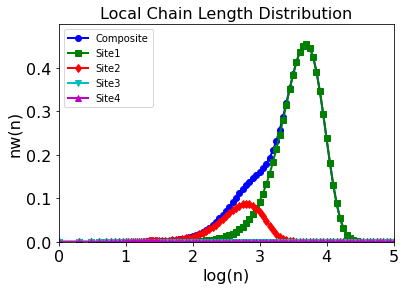

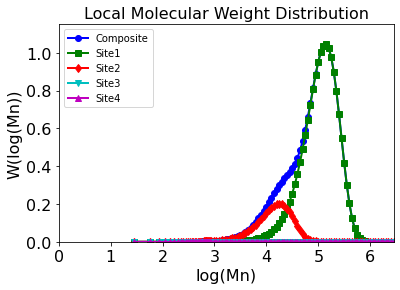

In [11]:
# 绘制第一个反应器产生的聚合物分布图
cstr1.plot_local_cld()
cstr1.plot_local_mwd()

In [12]:
# 查看第二个反应器的结果
cstr2.print_stream_results()
cstr2.print_results()

Stream Results: 
+--------------------------+------------------------+------------------------+------------------------+
|                          |        Product1        |         Feed2          |        Product2        |
+--------------------------+------------------------+------------------------+------------------------+
|           From           |         CSTR1          |                        |         CSTR2          |
|            To            |         CSTR2          |         CSTR2          |         Flash          |
|          Phase           |         liquid         |         liquid         |         liquid         |
|   Component Mole Flow    |                        |                        |                        |
|  Titanium Tetrachloride  |  0.008786228254963693  |  0.001464371375827282  |  0.010250599630790974  |
|    Triethyl Aluminum     |  0.02189758445327375   |  0.003649635888966047  |  0.025547180402685766  |
|         Ethylene         |   24.2848472067499

In [13]:
# 查看第二个反应器产生聚合物属性和分布
cstr2.print_local_polymer_attributes()
cstr2.print_local_cld()
cstr2.print_local_mwd()

CSTR2  Generated Polymer Attributes
+-----------+----------------------+--------------------+--------------------+-------------------+-------------------+--------------------+
|           | Poly Mass Generated  |        DPN         |        DPW         |        MWN        |        MWW        |        PDI         |
+-----------+----------------------+--------------------+--------------------+-------------------+-------------------+--------------------+
|   Site1   |   0.51845952010222   | 1462.1891580309236 | 2934.0393793049943 | 41019.90371400161 | 82310.83657757127 | 2.0066072595259543 |
|   Site2   | 0.06114088471698675  | 174.2194966648217  | 348.2826450500958  | 4887.511946755708 | 9770.637736400577 | 1.9991025787438226 |
|   Site3   | 0.048096154254645695 | 1454.251455938083  | 2907.5029153527917 | 40797.22132453755 | 81566.38898660753 | 1.9993123634022913 |
|   Site4   | 0.00970352651708269  | 173.70312386292574 | 346.4062536580082  | 4873.025748100791 | 9717.997902620884 | 1.994

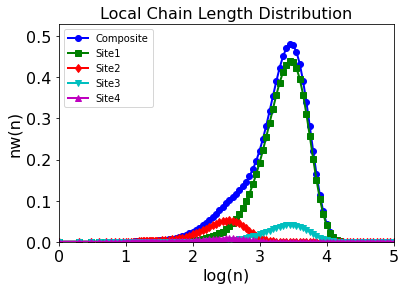

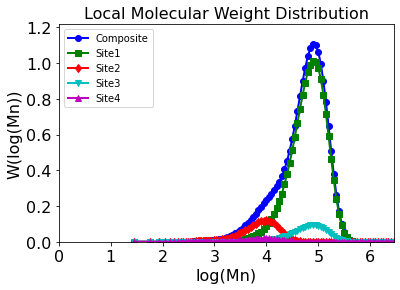

In [14]:
# 绘制第二个反应器产生的聚合物分布图
cstr2.plot_local_cld()
cstr2.plot_local_mwd()

In [15]:
# 查看第二个反应器出料的聚合物分布
product2.print_cld()
product2.print_mwd()

Product2  Site-based Chain Length Distribution
+----------+------------------------+-------------------------+------------------------+-------------------------+------------------------+
|   DPN    |         Site_1         |          Site_2         |         Site_3         |          Site_4         |       Composite        |
+----------+------------------------+-------------------------+------------------------+-------------------------+------------------------+
|   1.0    | 2.3385788992393859e-07 |  2.215448201692794e-06  | 1.3872218933362411e-08 |  1.9750293914373051e-07 | 2.6606812496938253e-06 |
|   2.0    | 9.348851304081498e-07  |  8.820940140899531e-06  | 5.545091327994149e-08  |  7.854714404364609e-07  | 1.0596747625024082e-05 |
|   3.0    | 2.1022628330347702e-06 |  1.9755653606488183e-05 | 1.2467919779610178e-07 |   1.75715374089669e-06  | 2.3739749378215745e-05 |
|   4.0    | 3.735173115880348e-06  |  3.495937117111399e-05  | 2.2150026508263616e-07 |  3.1058757593160983e-06 

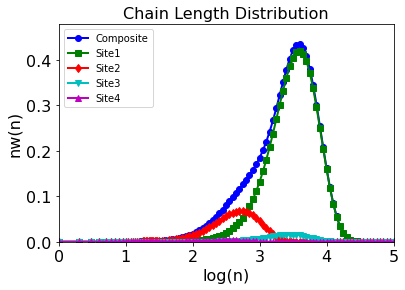

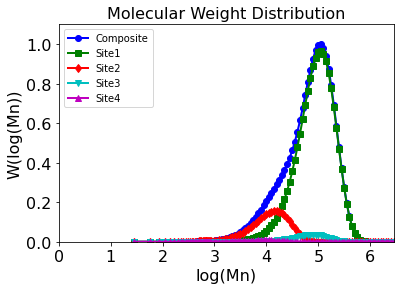

In [16]:
# 绘制第二个反应器出料的聚合物分布图
product2.plot_cld()
product2.plot_mwd()

In [17]:
# 查看闪蒸罐的结果
flash.print_stream_results()
flash.print_results()

Stream Results: 
+--------------------------+------------------------+-----------------------+------------------------+
|                          |        Product2        |          Gas          |        Polymer         |
+--------------------------+------------------------+-----------------------+------------------------+
|           From           |         CSTR2          |         Flash         |         Flash          |
|            To            |         Flash          |                       |                        |
|          Phase           |         liquid         |         vapor         |         liquid         |
|   Component Mole Flow    |                        |                       |                        |
|  Titanium Tetrachloride  |  0.010250599630790974  |          0.0          |  0.010247663238100843  |
|    Triethyl Aluminum     |  0.025547180402685766  |          0.0          |  0.025539862142633693  |
|         Ethylene         |   21.367429718498183   |   

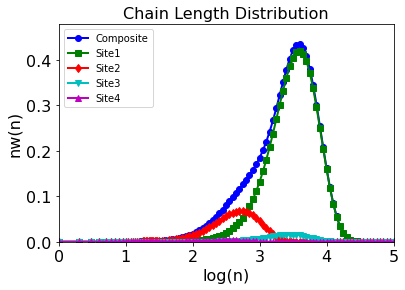

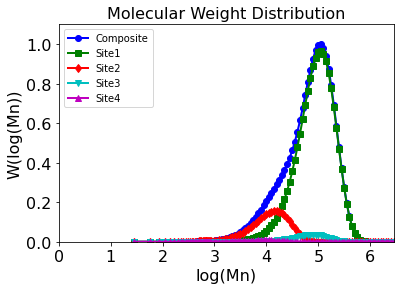

In [18]:
# 绘制产品的聚合物分布图
product.plot_cld()
product.plot_mwd()